# __나만의 데이터셋 만들기__

In [23]:
from PIL import Image
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torchvision
from torchvision import transforms

## 이미지 시각화하는 함수 생성

In [24]:
def imshow(img):
    img = img /2 + 0.5 # unnormalize
    np_img = img.numpy()
    # plt.imshow(np_img)
    plt.imshow(np.transpose(np_img, (1,2,0)))
    
    print(np_img.shape)
    print((np.transpose(np_img,(1,2,0))).shape)

In [25]:
trans = transforms.Compose([transforms.Resize((100,100)),
                           transforms.ToTensor(),
                           transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                           ])
trainset = torchvision.datasets.ImageFolder(root = "/home/pirl/Desktop/clothes",
                                           transform = trans)

#### __getitem__ 메소드로 데이터 하나를 가져와 본다.

In [5]:
trainset.__getitem__(18)

(tensor([[[0.9922, 0.9922, 0.9765,  ..., 1.0000, 1.0000, 1.0000],
          [0.9843, 0.9843, 0.9686,  ..., 1.0000, 1.0000, 1.0000],
          [0.9922, 0.9765, 0.9843,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],
 
         [[0.9922, 0.9922, 0.9765,  ..., 1.0000, 1.0000, 1.0000],
          [0.9843, 0.9843, 0.9686,  ..., 1.0000, 1.0000, 1.0000],
          [0.9922, 0.9765, 0.9843,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],
 
         [[0.9922, 0.9922, 0.9765,  ..., 1.0000, 1.0000, 1.0000],
          [0.9843, 0.9843, 0.9686,  ..., 1.0000, 1.0000, 1.0000],
          [0.9922, 0.9765, 0.9843,  ...,

In [6]:
len(trainset)

24

In [12]:
trainloader = DataLoader(trainset,
                        batch_size = 16,
                        shuffle = False,
                        num_workers = 4)

In [26]:
classes = trainset.classes
classes

['bag', 'shoes', 'tshirts']

In [15]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(labels)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])


torch.Size([16, 3, 100, 100])
(3, 410, 410)
(410, 410, 3)
torch.Size([16, 3, 100, 100])
torch.Size([3, 206, 818])
  bag   bag   bag   bag   bag   bag   bag   bag shoes shoes shoes shoes shoes shoes shoes shoes 


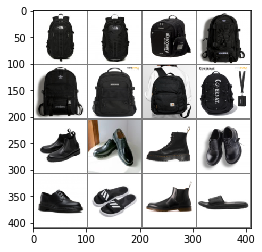

In [21]:
print(images.shape)
imshow(torchvision.utils.make_grid(images, nrow=4))
print(images.shape)
print((torchvision.utils.make_grid(images)).shape)
print("".join("%5s "%classes[labels[j]] for j in range(16)))